In [1]:
import numpy as np
from qiskit import *
import matplotlib
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram
%matplotlib inline

In [2]:
IBMQ.load_account()
provider = IBMQ.get_provider(group='open')
backend = provider.get_backend('ibmq_belem')
qbackend = Aer.get_backend('qasm_simulator') 

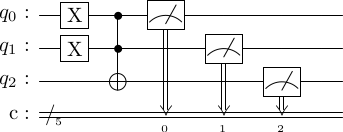

In [3]:
# Moving on to larger circuits, we have the Toffoli gate - a three qubit gate
circuitT = QuantumCircuit(5, 5)
circuitT.x(0)
circuitT.x(1)
circuitT.toffoli(0, 1, 2)
circuitT.measure(0, 0)
circuitT.measure(1, 1)
circuitT.measure(2, 2)
circuitT.draw(output='latex', idle_wires=False)

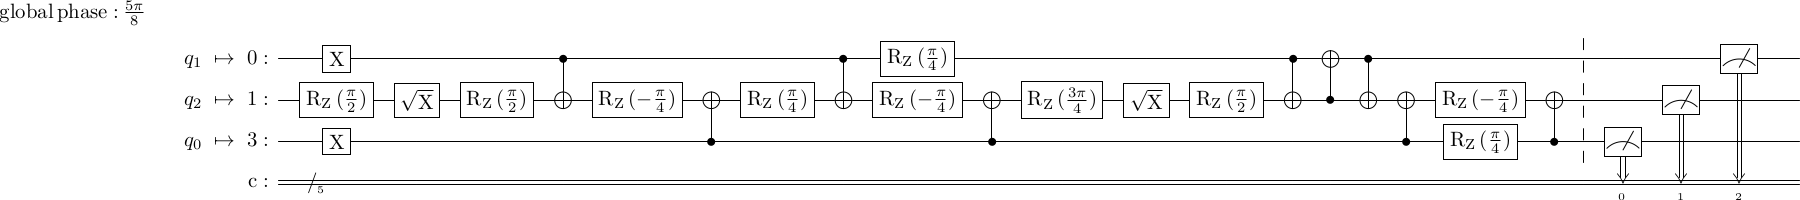

In [10]:
# Transpiled Toffoli circuit
# run again to show how the circuit changes after each transpilation
circuitT_t = transpile(circuitT, backend=backend)
circuitT_t.draw(output='latex', idle_wires=False)

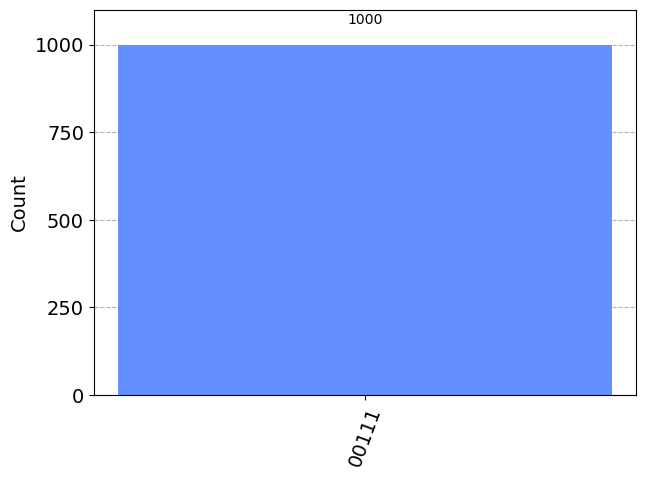

In [6]:
# theoretically, we are expected to just obtain 00111 as the output result
# below is the result from a Qiskit simulator
job = execute(circuitT, backend=qbackend, shots=1000)
countsT = job.result().get_counts()
plot_histogram(countsT)

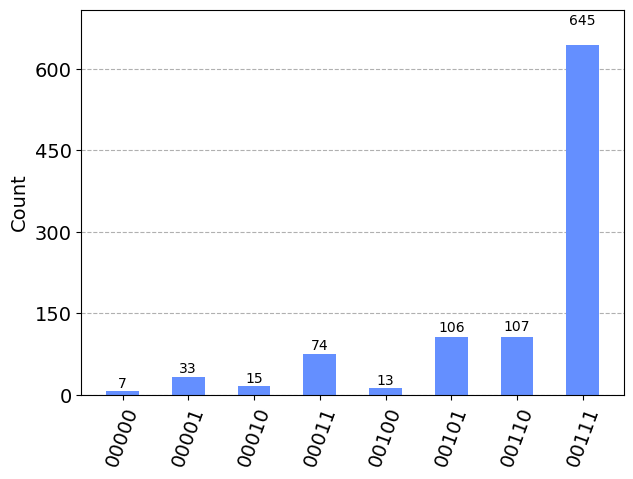

In [8]:
# Below are the results of running the toffoli circuit on an actual quantum computer
# we can clearly see the errors
job = execute(circuitT, backend=backend, shots=1000)
countsT_t = job.result().get_counts()
plot_histogram(countsT_t)